In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
class GAN:
    def __init__(self, generator, discriminator):
        
        optimizer = tfa.optimizers.Lookahead(
            tfa.optimizers.AdamW(),
            sync_period=250
        )
        
        
        self.generator = generator
        self.discriminator = discriminator
        
        
        
        self.discriminator.compile(loss='binary_crossentropy',
                          optimizer=optimizer, 
                          metrics=['accuracy'])
        
        
        self.discriminator.trainable = False
        self.gan = tf.keras.models.Sequential([self.generator, self.discriminator])
        self.gan.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        
    def train(self, train_x, iterations, batch_size, sample_interval):
        self.losses = []
        self.accuracies = []
        self.sample_interval = []
        self.iterations = iterations
        
        
        real = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for iteration in range(iterations + 1):

            idx = np.random.randint(0, train_x.shape[0], batch_size)
            imgs = train_x[idx]
            z = np.random.normal(0, 1, (batch_size, 100))
            gen_imgs = self.generator.predict(z)

            d_loss_real = self.discriminator.train_on_batch(imgs, real)
            d_loss_fake = self. discriminator.train_on_batch(gen_imgs, fake)
            d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

            z = np.random.normal(0, 1, (batch_size, 100))
            gen_imgs = self.generator.predict(z)
            g_loss = self.gan.train_on_batch(z, real)
            
            if iteration % sample_interval == 0:
                self.losses.append((d_loss, g_loss))
                self.accuracies.append(100. * accuracy)
                print('iteration {: 5d} [D loss: {:4f} acc: {:.4f} %] [G loss: {:4f}]'.format(iteration + 1, d_loss, 100.0 * accuracy, g_loss))
                self.sample_images(4, 4, 100)
    
    def sample_images(self, row, col, z_dim):
        z = np.random.normal(0, 1, (row * col, z_dim))
        gen_imgs = self.generator.predict(z)
        scaler = MinMaxScaler(copy=True)
        base_shape = gen_imgs.shape
        gen_imgs = scaler.fit_transform(gen_imgs.flatten().reshape(-1, 1)).reshape(base_shape)
        fig, axis = plt.subplots(row, col, figsize=(4, 4), sharey=True, sharex=True)
    
        count = 0
        for i in range(row):
            for j in range(col):
                axis[i, j].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                axis[i, j].axis('off')
                count += 1
            
        plt.show()
    
    def lerning_curve(self):
        iteration_checkpoints = []
        for iteration in range(self.iterations):
            if iteration % self.sample_interval == 0:
                iteration_checkpoints.append(iteration)
        self.losses = np.array(self.losses)
        plt.figure(figsize=(6, 2))
        plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
        plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

        plt.xticks(iteration_checkpoints, rotation=90)

        plt.title("Training Loss")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
    
    
        self.accuracies = np.array(self.accuracies)

        plt.figure(figsize=(15, 5))
        plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

        plt.xticks(iteration_checkpoints, rotation=90)
        plt.yticks(range(0, 100, 5))

        plt.title("Discriminator Accuracy")
        plt.xlabel("Iteration")
        plt.ylabel("Accuracy (%)")
        plt.legend()
        plt.show()

In [3]:
generator = tf.keras.Sequential([
    tf.keras.layers.Dense(256 * 7 * 7, input_dim=100),    
    tf.keras.layers.Reshape((7, 7, 256)),
    tf.keras.layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Conv2DTranspose(64, kernel_size=3, strides=1, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding='same'),
    tf.keras.layers.Activation('tanh')
])

In [4]:
img_shape = (28, 28, 1)

In [5]:
discriminator = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, strides=2, input_shape=img_shape, padding='same'),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Conv2D(64, kernel_size=3, strides=2, input_shape=img_shape, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Conv2D(128, kernel_size=3, strides=2, input_shape=img_shape, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.01),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

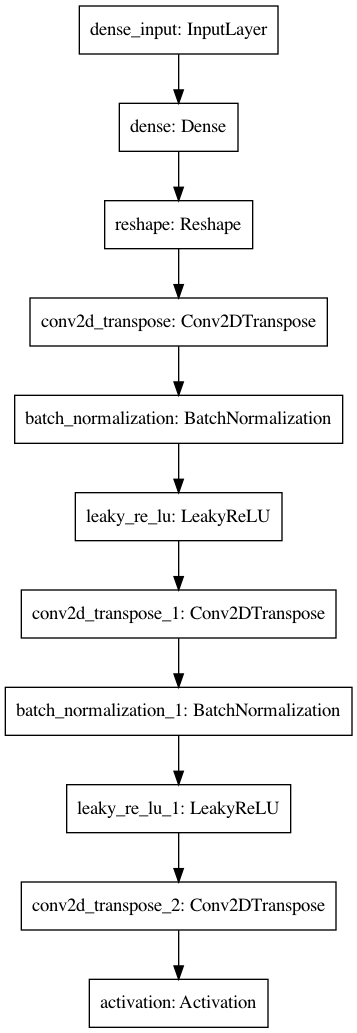

In [6]:
tf.keras.utils.plot_model(generator)

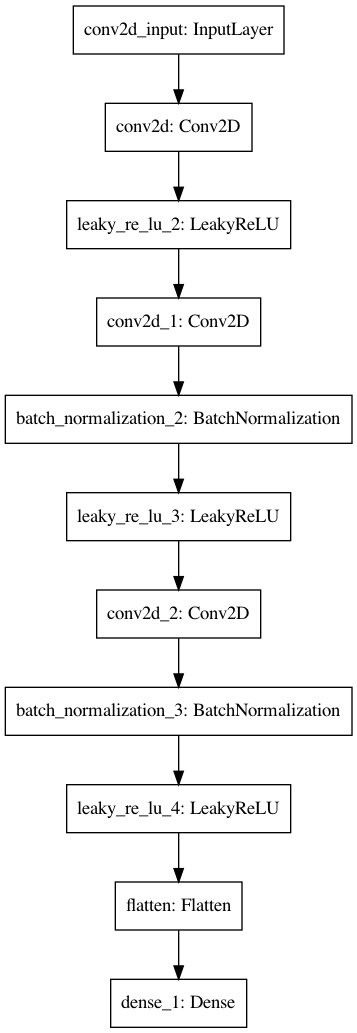

In [7]:
tf.keras.utils.plot_model(discriminator)

In [8]:
model = GAN(generator, discriminator)

In [9]:
(train_x, _), (_, _) = tf.keras.datasets.mnist.load_data()

In [10]:
train_x = train_x / (255 / 2) - 1.
train_x = np.expand_dims(train_x, axis=3)

iteration     1 [D loss: 1.198845 acc: 36.9048 %] [G loss: 0.670593


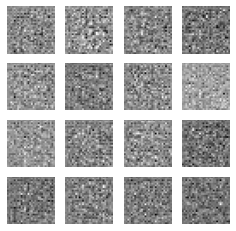

iteration  2501 [D loss: 0.000195 acc: 100.0000 %] [G loss: 0.186098


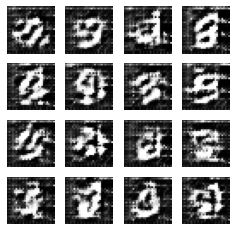

iteration  5001 [D loss: 0.000047 acc: 100.0000 %] [G loss: 0.545358


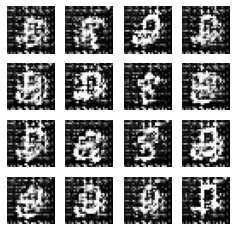

iteration  7501 [D loss: 0.000012 acc: 100.0000 %] [G loss: 0.089607


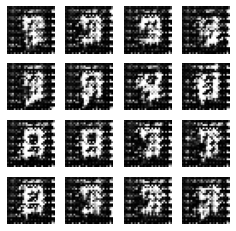

iteration  10001 [D loss: 0.166394 acc: 92.0635 %] [G loss: 0.138061


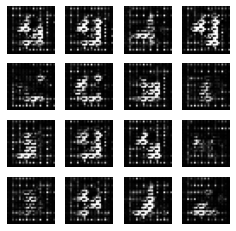

iteration  12501 [D loss: 0.000006 acc: 100.0000 %] [G loss: 0.073473


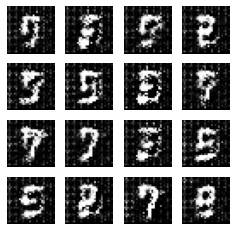

iteration  15001 [D loss: 0.000001 acc: 100.0000 %] [G loss: 0.004536


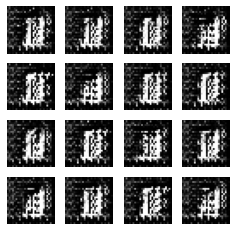

iteration  17501 [D loss: 0.000001 acc: 100.0000 %] [G loss: 0.004737


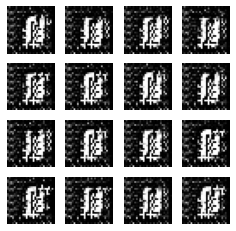

In [11]:
model.train(train_x, 20000, 126, 2500)

In [12]:
class PEGAN:
    # 真のデータのラベルを0.9にする
    def __init__(self, generator, discriminator):
        
        optimizer = tfa.optimizers.Lookahead(
            tfa.optimizers.AdamW(weight_decay=1e-5),
            sync_period=250
        )
        
        
        self.generator = generator
        self.discriminator = discriminator
        
        
        
        self.discriminator.compile(loss='binary_crossentropy',
                          optimizer=optimizer, 
                          metrics=['accuracy'])
        
        
        self.discriminator.trainable = False
        self.gan = tf.keras.models.Sequential([self.generator, self.discriminator])
        self.gan.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        
    def train(self, train_x, iterations, batch_size, sample_interval):
        self.losses = []
        self.accuracies = []
        self.sample_interval = []
        self.iterations = iterations
        
        
        real = np.full((batch_size, 1), 0.9)
        fake = np.zeros((batch_size, 1))

        for iteration in range(iterations):

            idx = np.random.randint(0, train_x.shape[0], batch_size)
            imgs = train_x[idx]
            z = np.random.normal(0, 1, (batch_size, 100))
            gen_imgs = self.generator.predict(z)

            d_loss_real = self.discriminator.train_on_batch(imgs, real)
            d_loss_fake = self. discriminator.train_on_batch(gen_imgs, fake)
            d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

            z = np.random.normal(0, 1, (batch_size, 100))
            gen_imgs = self.generator.predict(z)
            g_loss = self.gan.train_on_batch(z, real)
            
            if iteration % sample_interval == 0:
                self.losses.append((d_loss, g_loss))
                self.accuracies.append(100. * accuracy)
                print('iteration {: 5d} [D loss: {:4f} acc: {:.4f} %] [G loss: {:4f}'.format(iteration + 1, d_loss, 100.0 * accuracy, g_loss))
                self.sample_images(4, 4, 100)
    
    def sample_images(self, row, col, z_dim):
        z = np.random.normal(0, 1, (row * col, z_dim))
        gen_imgs = self.generator.predict(z)
        scaler = MinMaxScaler(copy=True)
        base_shape = gen_imgs.shape
        gen_imgs = scaler.fit_transform(gen_imgs.flatten().reshape(-1, 1)).reshape(base_shape)
        fig, axis = plt.subplots(row, col, figsize=(4, 4), sharey=True, sharex=True)
    
        count = 0
        for i in range(row):
            for j in range(col):
                axis[i, j].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                axis[i, j].axis('off')
                count += 1
            
        plt.show()
    
    def lerning_curve(self):
        iteration_checkpoints = []
        for iteration in range(self.iterations):
            if iteration % self.sample_interval == 0:
                iteration_checkpoints.append(iteration)
        self.losses = np.array(self.losses)
        plt.figure(figsize=(6, 2))
        plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
        plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

        plt.xticks(iteration_checkpoints, rotation=90)

        plt.title("Training Loss")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
    
    
        self.accuracies = np.array(self.accuracies)

        plt.figure(figsize=(15, 5))
        plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

        plt.xticks(iteration_checkpoints, rotation=90)
        plt.yticks(range(0, 100, 5))

        plt.title("Discriminator Accuracy")
        plt.xlabel("Iteration")
        plt.ylabel("Accuracy (%)")
        plt.legend()
        plt.show()

In [13]:
(train_x, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_x = train_x / (255 / 2) - 1.
train_x = np.expand_dims(train_x, axis=3)

In [14]:
model = PEGAN(generator, discriminator)

iteration     1 [D loss: 3.990202 acc: 0.0000 %] [G loss: 0.713639


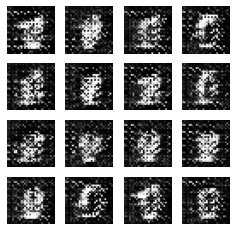

iteration  2501 [D loss: 1.459329 acc: 0.0000 %] [G loss: 0.325258


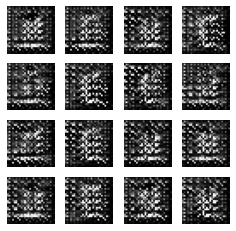

iteration  5001 [D loss: 1.461351 acc: 0.0000 %] [G loss: 0.325119


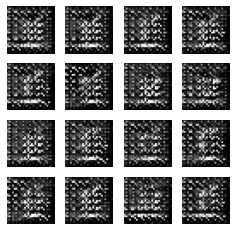

iteration  7501 [D loss: 1.439546 acc: 0.0000 %] [G loss: 0.325107


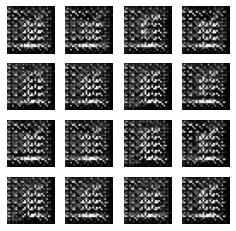

iteration  10001 [D loss: 1.456891 acc: 0.0000 %] [G loss: 0.325088


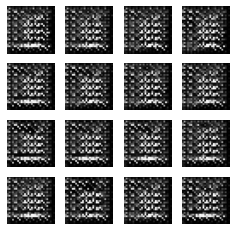

iteration  12501 [D loss: 1.456412 acc: 0.0000 %] [G loss: 0.325085


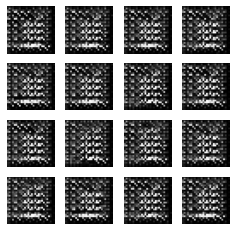

iteration  15001 [D loss: 1.482474 acc: 0.0000 %] [G loss: 0.325084


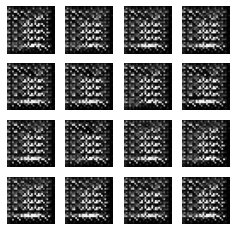

iteration  17501 [D loss: 1.467180 acc: 0.0000 %] [G loss: 0.325084


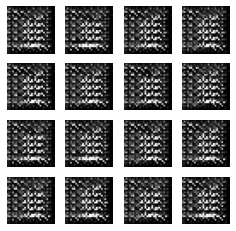

In [15]:
model.train(train_x, 20000, 126, 2500)